<a href="https://colab.research.google.com/github/anhhaibkhn/LeetCode_Daily_Challenges/blob/master/JulyLeetCodePart1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

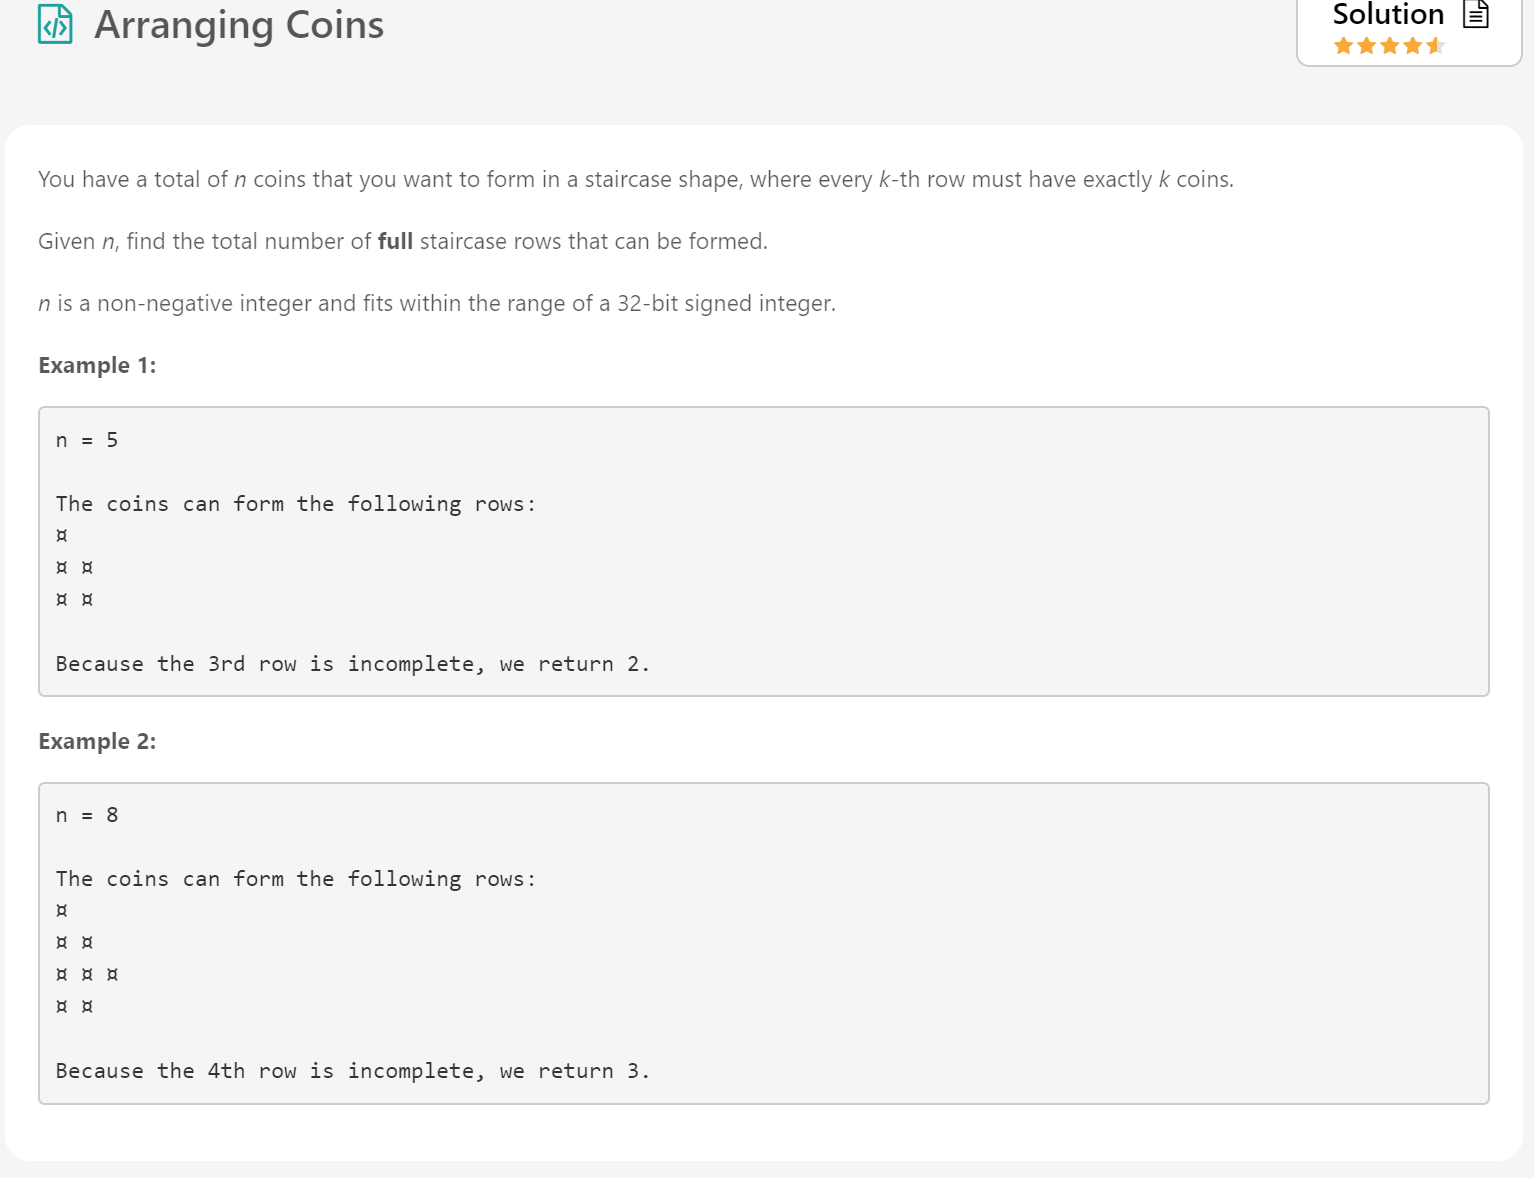

In [ ]:
''' July 1st Arranging coins
Should have used binary search appoarch 
'''
# solution : https://leetcode.com/articles/arranging-coins/

# quite dump solution 
class Solution:
    def arrangeCoins(self, n: int) -> int:
        total = n
        for i in range(0,n+1):
            total = total - i
            if total < 0:
                return i-1
            
        return 0 if n==0 else 1 

# fastest solution
class Solution:
    def arrangeCoins(self, n: int) -> int:
        l, r = 1, 65536
        while l < r:
            mid = (l + r) >> 1
            if mid * (mid + 1) // 2 <= n:
                l = mid + 1
            else:
                r = mid
        return l - 1


# 1 line solution 
class Solution:
    def arrangeCoins(self, n: int) -> int:
        return int((-1 + sqrt(1 + 8*n)) // 2)


# 1 line solution 
class Solution:
    def arrangeCoins(self, n: int) -> int:
        return floor((-1+sqrt(1+8*n))/2)
  


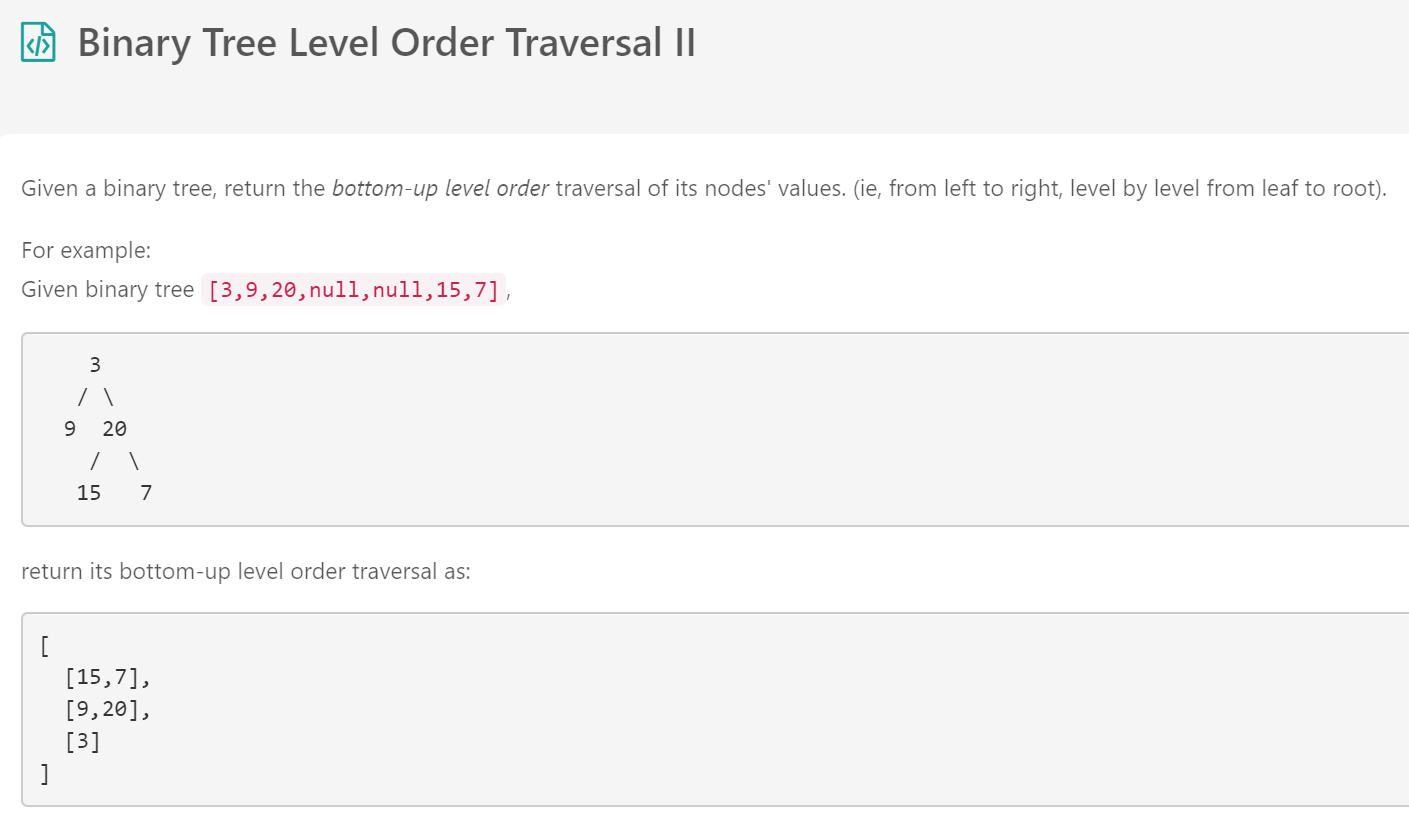

In [ ]:
''' July 2nd my solution using bfs
'''
# Definition for a binary tree node.
# class TreeNode:
#     def __init__(self, val=0, left=None, right=None):
#         self.val = val
#         self.left = left
#         self.right = right
class Solution:
    def levelOrderBottom(self, root: TreeNode) -> List[List[int]]:
        dic = {}
        layer = 0
        
        def bfs(node : TreeNode, layer :int):
            if not node:
                return
            if layer in dic:
                dic[layer] += [node.val]
            else:
                dic[layer] = [node.val]
                
            if node.left:
                bfs(node.left,layer + 1)
            if node.right:
                bfs(node.right,layer + 1)
                
        bfs(root,layer)
        
        return reversed(list(dic.values()))

### fastest solution , same idea

class Solution:
    def levelOrderBottom(self, root: TreeNode) -> List[List[int]]:
        levels = [] # len of leves is the same as layer number
        if not root:
            return levels
        
        def helper(node,level):
            
            if len(levels)==level: 
                levels.append([]) # append new layer
            
            levels[level].append(node.val) # layer append new values
            
            if node.left: helper(node.left, level+1)
            if node.right: helper(node.right, level+1)
        
        helper(root,0)
        return levels[::-1]  # reversed list


### 2nd fastest solution using while loop , Stack
class Solution:
    def levelOrderBottom(self, root: TreeNode) -> List[List[int]]:
        res = []
        queue = []
        
        queue.append(root)
        
        while queue:
            level = []
            size = len(queue)
            
            #node = queue.pop(0)
            #print(queue)
            for _ in range(size):    
                node = queue.pop(0)
                if node is not None:
                    level.append(node.val)
                    queue.append(node.left)
                    queue.append(node.right)
            if level != []:
                res.insert(0, level)
                
            
        return res

In [ ]:
# Summary 3 approaches
# 1. dfs recursively
def levelOrderBottom1(self, root):
    res = []
    self.dfs(root, 0, res)
    return res

def dfs(self, root, level, res):
    if root:
        if len(res) < level + 1:
            res.insert(0, [])
        res[-(level+1)].append(root.val)
        self.dfs(root.left, level+1, res)
        self.dfs(root.right, level+1, res)
        
# 2. dfs + stack
def levelOrderBottom2(self, root):
    stack = [(root, 0)]
    res = []
    while stack:
        node, level = stack.pop()
        if node:
            if len(res) < level+1:
                res.insert(0, [])
            res[-(level+1)].append(node.val)
            stack.append((node.right, level+1))
            stack.append((node.left, level+1))
    return res
 
# 3. bfs + queue   
def levelOrderBottom(self, root):
    queue, res = collections.deque([(root, 0)]), []
    while queue:
        node, level = queue.popleft()
        if node:
            if len(res) < level+1:
                res.insert(0, [])
            res[-(level+1)].append(node.val)
            queue.append((node.left, level+1))
            queue.append((node.right, level+1))
    return res